In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.base import TransformerMixin
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('./Data/all_text_clean.csv')

In [3]:
df.head()

,Unnamed: 0,text,subreddit,lemmatized
0,0,what do you do in a relationshipfor someone wh...,1,what do you do in a relationshipfor someone wh...
1,1,get over heartbreak,1,get over heartbreak
2,2,how to overcome not feeling good enough,1,how to overcome not feeling good enough
3,3,those with chronic depression what kind of sup...,1,those with chronic depression what kind of sup...
4,4,how to overcome deep insecurities,1,how to overcome deep insecurity


In [4]:
#importing dataset that's been cleaned (only includes a-z and 0-9) and lemmatized

In [5]:
clean = pd.read_csv('./Data/text_clean.csv')

In [6]:
clean['subreddit'] = df['subreddit']

In [7]:
clean.head()

,text,titles,lemmatized,titles_lemmatized,subreddit
0,why is makeup so important? why cant some girl...,why is makeup so important? why cant some girl...,why is makeup so important? why cant some girl...,why is makeup so important? why cant some girl...,1.0
1,do you ever find the close male friendshipbrom...,do you ever find the close male friendshipbrom...,do you ever find the close male friendshipbrom...,do you ever find the close male friendshipbrom...,1.0
2,why do some women not like being called babe a...,why do some women not like being called babe a...,why do some woman not like being called babe a...,why do some woman not like being called babe a...,1.0
3,peeing instead of having an orgasm help!hi eve...,peeing instead of having an orgasm help!,peeing instead of having an orgasm help!hi eve...,peeing instead of having an orgasm help!,1.0
4,isshould gender be assigned,isshould gender be assigned,isshould gender be assigned,isshould gender be assigned,1.0


In [8]:
#realized I forgot to drop nas from cleaned dataset

In [9]:
clean.isna().sum()

text                   0
titles                 2
lemmatized             0
titles_lemmatized      2
subreddit            979
dtype: int64

In [10]:
clean = clean.dropna()

In [11]:
x = clean['text']
y = clean['subreddit']

In [12]:
x

0       why is makeup so important? why cant some girl...
1       do you ever find the close male friendshipbrom...
2       why do some women not like being called babe a...
3       peeing instead of having an orgasm help!hi eve...
4                             isshould gender be assigned
                              ...                        
4916    how much toilet paper does your girlfriend use...
4917    how do you make others at work look foolish wh...
4918                                         just curious
4919    how do guys show they like another guy?i worke...
4920                  mom married 4 times son wont commit
Name: text, Length: 4920, dtype: object

In [13]:
y.value_counts(normalize = True)

1.0    0.502033
0.0    0.497967
Name: subreddit, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13)

### First model countvectorizer with logistic regression

In [15]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
('lr', LogisticRegression())
])

In [16]:
pipe_params = {'cvec__max_df': [.8, .9, .99],
              'cvec__min_df':[1, 2, 3, 5],
              'cvec__ngram_range': [(1, 2), (1, 2)],
              'cvec__stop_words':['english', ]}

In [17]:
#using gridsearch to check all the different hyperparameters

In [18]:
gs = GridSearchCV(pipe, pipe_params, cv = 5)

In [19]:
gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [20]:
gs.best_score_

0.6314363143631436

In [21]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                      

In [22]:
#checking the test score

In [23]:
model = gs.best_estimator_
model.fit(x_train, y_train)
model.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.634959349593496

In [24]:
gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [25]:
gs.best_score_

0.6314363143631436

### Trying another model on the same dataset, tfid and logistic regression

In [26]:
pipe2 = Pipeline([
    ('tf', TfidfVectorizer()),
('lr', LogisticRegression())
])

pipe_params = {'tf__max_df': [.8, .9, .99],
              'tf__min_df':[1, 2],
              'tf__ngram_range': [(1, 2), (1, 2)],
              'tf__stop_words':['english', ]}

gs = GridSearchCV(pipe2, 
                 pipe_params)

gs.fit(x_train, y_train)

print (gs.best_score_)
print (gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to

0.6281842818428184
{'tf__max_df': 0.8, 'tf__min_df': 1, 'tf__ngram_range': (1, 2), 'tf__stop_words': 'english'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
#trying the same model on the lemmatized text

In [28]:
x = clean['lemmatized']
y = clean['subreddit']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 13)

In [29]:
pipe2 = Pipeline([
    ('tf', TfidfVectorizer()),
('lr', LogisticRegression())
])

pipe_params = {'tf__max_df': [.8, .9, .99],
              'tf__min_df':[1, 2],
              'tf__ngram_range': [(1, 2), (1, 2)],
              'tf__stop_words':['english', ]}

gs = GridSearchCV(pipe2, 
                 pipe_params)

gs.fit(x_train, y_train)

print (gs.best_score_)
print (gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to

0.6200542005420054
{'tf__max_df': 0.8, 'tf__min_df': 2, 'tf__ngram_range': (1, 2), 'tf__stop_words': 'english'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Reading in a different dataset. This one only includes posts that were not removed by moderators.

In [30]:
df = pd.read_csv('./Data/no_removed.csv')

In [31]:
df.head()

,title,selftext,subreddit,text
0,Any insight on how to handle a coworker trying...,"So over the past month or so, I’ve gotten pret...",0,Any insight on how to handle a coworker trying...
1,"Women of reddit, what are you really getting o...",I just became curious because I saw this porn ...,0,"Women of reddit, what are you really getting o..."
2,How far would you go for love?,I recently was asked out by a guy Im really fo...,0,How far would you go for love?I recently was a...
3,"Menly men of askmen, what's a unique thing you...",NaN,0,"Menly men of askmen, what's a unique thing you..."
4,How would you react if your barista gave you h...,Hi! So I work as a barista and have a regular ...,0,How would you react if your barista gave you h...


In [32]:
x = df['text'] #titles and self text combined
y = df['subreddit']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, stratify = y)

In [34]:
gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [35]:
gs.best_score_

0.6772616136919315

In [36]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('tf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scalin

In [37]:
model = gs.best_estimator_
model.fit(x_train, y_train)
model.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.69559902200489

### Tfid vectorizer with logistic regression

In [38]:
tf = TfidfVectorizer()

In [39]:
pipe2 = Pipeline([
    ('tf', TfidfVectorizer()),
('lr', LogisticRegression())
])

In [40]:
pipe_params = {'tf__max_df': [.8, .9, .99],
              'tf__min_df':[1, 2],
              'tf__ngram_range': [(1, 2), (1, 2)],
              'tf__stop_words':['english', ]}

In [41]:
gs = GridSearchCV(pipe2, 
                 pipe_params)

In [42]:
gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [43]:
gs.best_score_

0.6772616136919315

In [44]:
gs.best_params_

{'tf__max_df': 0.8,
 'tf__min_df': 2,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': 'english'}

In [45]:
model = gs.best_estimator_
model.fit(x_train, y_train)
model.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.69559902200489

In [46]:
tf = TfidfVectorizer(max_df=.8, min_df=2, ngram_range=(1, 2), stop_words='english')
lr = LogisticRegression()

In [47]:
x_train_tf = tf.fit_transform(x_train)
x_test_tf = tf.transform(x_test)

In [48]:
lr.fit(x_train_tf, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lr.score(x_train_tf, y_train)

0.8903830480847595

In [50]:
lr.score(x_test_tf, y_test)

0.69559902200489

In [51]:
#Evaluating model

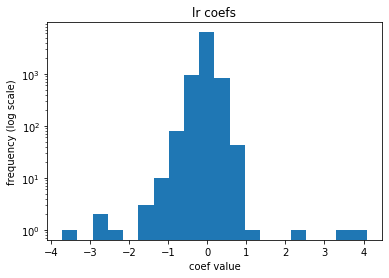

In [52]:
coefs = pd.DataFrame(tf.get_feature_names(),columns=['word'])
coefs['beta'] = lr.coef_[0]
plt.hist(coefs['beta'], log=True, bins=20);
plt.xlabel('coef value')
plt.ylabel('frequency (log scale)')
plt.title('lr coefs');

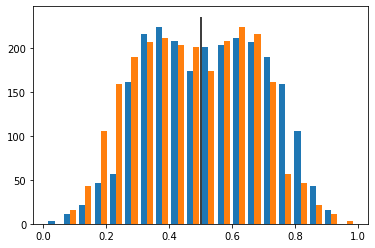

In [53]:
pred_y = lr.predict_proba(x_train_tf)
plt.hist(pred_y, bins=20);
plt.vlines(0.5, plt.ylim()[0], plt.ylim()[1] );

best model so far about .7, all text with no removed posts, no cleaning

{'tf__max_df': 0.8,
 'tf__min_df': 2,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': 'english'}
 
 logistic regression

### Trying gaussian bayesian with tfid vectorizer

In [54]:
x = df['text']
y = df['subreddit']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13)

In [55]:
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [56]:
ga = GaussianNB() 

pipe3 = Pipeline([
    ('tf', TfidfVectorizer()),
    ('to_dense', DenseTransformer()), #fix error about sparse matrix going into model
('ga', GaussianNB() )
])

In [57]:
pipe_params = {'tf__max_df': [.8, .9, .99],
              'tf__min_df':[1, 2],
              'tf__ngram_range': [(1, 2), (1, 2)],
              'tf__stop_words':['english', None ]}

In [58]:
gs = GridSearchCV(pipe3, pipe_params)

In [59]:
gs.fit(x_train, y_train)
print(gs.best_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6312143439282804


### Multinomial bayesian with counvectorizer

In [60]:
mn = MultinomialNB() 

pipe4 = Pipeline([
    ('cvec', CountVectorizer()),
('mn', MultinomialNB())
])

pipe_params = {'cvec__max_df': [.8, .9, .99],
              'cvec__min_df':[1, 2, 3, 5],
              'cvec__ngram_range': [(1, 2), (1, 2)],
              'cvec__stop_words':['english', ]}

In [61]:
gs = GridSearchCV(pipe4, pipe_params)

In [62]:
gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [63]:
gs.best_score_

0.6556642216788916

In [64]:
gs.best_params_

{'cvec__max_df': 0.8,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

### Random forest with CVEC

In [65]:
rf = RandomForestClassifier()

pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
('rf', RandomForestClassifier())
])

pipe_params = {'cvec__max_df': [.8, .9, .99],
              'cvec__min_df':[1, 2, 3, 5], 
              'cvec__ngram_range': [(1, 1), (1, 2)],
              'cvec__stop_words':['english'],
               'cvec__max_features':[500, 1000, 2000],
               'rf__n_estimators':[200],}

In [66]:
gs = GridSearchCV(pipe5, pipe_params)

In [67]:
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6784841075794621
{'cvec__max_df': 0.8, 'cvec__max_features': 2000, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'rf__n_estimators': 200}


In [68]:
gs.score(x_test, y_test)

0.6601466992665037

In [69]:
cvec = CountVectorizer(stop_words='english', ngram_range= (1, 2), min_df=2, max_df=.8)

In [70]:
x_train_cvec = cvec.fit_transform(x_train)

In [71]:
x_test_cvec = cvec.transform(x_test)

In [72]:
rf = RandomForestClassifier(max_features=2000, n_estimators=200)

In [73]:
rf.fit(x_train_cvec, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2000, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rf.score(x_train_cvec, y_train)

0.9959250203748982

In [75]:
rf.score(x_test_cvec, y_test)

0.6638141809290954

### Checking TFID vectorizer results

In [76]:
tf = TfidfVectorizer(max_features=2000, stop_words='english', ngram_range=(1, 2))

In [77]:
x_train_tf = tf.fit_transform(x_train)

In [78]:
x_train_tf.toarray().shape

(2454, 2000)

In [79]:
tf_df = pd.DataFrame(x_train_tf.toarray(), columns = tf.get_feature_names())

In [80]:
pd.DataFrame(x_train_tf.toarray(), columns = tf.get_feature_names()).sum(axis =0)

10             4.852989
10 years       0.683182
100            3.144701
12             1.850898
15             1.621589
                 ...   
younger        2.281341
youtube        2.797524
youtube com    0.830529
zero           1.922887
zone           1.678070
Length: 2000, dtype: float64

In [81]:
tf_df.sum().sort_values(ascending = False).head(20) 

like            68.859170
women           67.837131
men             63.247336
did             55.338847
feel            53.093628
just            52.226312
guys            43.982010
ve              43.956010
guy             42.071356
know            41.075520
sex             40.871319
time            40.260781
want            39.053079
don             38.506967
think           38.037006
reddit          37.391772
girl            36.495396
really          35.517653
relationship    35.422273
love            34.606491
dtype: float64

In [82]:
tf_df[tf_df['subreddit']==1].sum().sort_values(ascending = True).head(20) 

10          0.0
position    0.0
porn        0.0
popular     0.0
poor        0.0
polite      0.0
points      0.0
point       0.0
pms         0.0
plus        0.0
plenty      0.0
pleasure    0.0
playing     0.0
played      0.0
play        0.0
platonic    0.0
plans       0.0
planning    0.0
planned     0.0
plan        0.0
dtype: float64

In [83]:
tf_df[tf_df['subreddit']==0].sum().sort_values(ascending = True).head(20) 

subreddit      0.000000
claim          0.291217
potentially    0.358469
nearby         0.373976
savings        0.390408
gas            0.396876
earns          0.414029
shown          0.446861
base           0.465164
lily           0.488782
rant           0.493354
contribute     0.509824
release        0.548175
ground         0.555362
weights        0.556122
prenup         0.557300
said yes       0.567724
opportunity    0.569891
sucks          0.575402
natural        0.583896
dtype: float64

In [84]:
#random forest with countvectorizer has similar performance to the tfid with LR

In [85]:
gs.estimator

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [86]:
#try most succesful models on cleaned dataset -- random forest with cvec and tfidf with lr

### Trying models on cleaned data

In [87]:
df.head()

,title,selftext,subreddit,text
0,Any insight on how to handle a coworker trying...,"So over the past month or so, I’ve gotten pret...",0,Any insight on how to handle a coworker trying...
1,"Women of reddit, what are you really getting o...",I just became curious because I saw this porn ...,0,"Women of reddit, what are you really getting o..."
2,How far would you go for love?,I recently was asked out by a guy Im really fo...,0,How far would you go for love?I recently was a...
3,"Menly men of askmen, what's a unique thing you...",NaN,0,"Menly men of askmen, what's a unique thing you..."
4,How would you react if your barista gave you h...,Hi! So I work as a barista and have a regular ...,0,How would you react if your barista gave you h...


In [88]:
df['subreddit'].value_counts(normalize = True) #making sure classes are balanced

0    0.523839
1    0.476161
Name: subreddit, dtype: float64

In [89]:
df = df.dropna()

In [90]:
df.isna().sum()

title        0
selftext     0
subreddit    0
text         0
dtype: int64

In [92]:
x = df['text'] #titles and self text combined
y = df['subreddit']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, stratify = y)

### Random Forest with CVEC

In [93]:
rf = RandomForestClassifier()

pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
('rf', RandomForestClassifier())
])

pipe_params = {'cvec__max_df': [.8, .9, .99],
              'cvec__min_df':[1, 2, 3, 5], 
              'cvec__ngram_range': [(1, 1), (1, 2)],
              'cvec__stop_words':['english'],
               'rf__n_estimators':[200],}

gs = GridSearchCV(pipe5, pipe_params)

gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7134502923976608
{'cvec__max_df': 0.8, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'rf__n_estimators': 200}


In [94]:
gs.score(x_test, y_test)

0.7117794486215538

In [95]:
#test score improves with trees 150 to 200 but benefits of increasing trees seem to decrease as trees 200 to 300

In [96]:
#evaluating results

In [97]:
preds = gs.predict(x_test)

In [98]:
preds_proba = gs.predict_proba(x_test)

In [99]:
preds_proba

array([[0.79 , 0.21 ],
       [0.4  , 0.6  ],
       [0.115, 0.885],
       [0.75 , 0.25 ],
       [0.69 , 0.31 ],
       [0.34 , 0.66 ],
       [0.55 , 0.45 ],
       [0.535, 0.465],
       [0.67 , 0.33 ],
       [0.78 , 0.22 ],
       [0.7  , 0.3  ],
       [0.595, 0.405],
       [0.67 , 0.33 ],
       [0.68 , 0.32 ],
       [0.815, 0.185],
       [0.77 , 0.23 ],
       [0.795, 0.205],
       [0.93 , 0.07 ],
       [0.7  , 0.3  ],
       [0.255, 0.745],
       [0.7  , 0.3  ],
       [0.76 , 0.24 ],
       [0.755, 0.245],
       [0.375, 0.625],
       [0.855, 0.145],
       [0.79 , 0.21 ],
       [0.695, 0.305],
       [0.87 , 0.13 ],
       [0.27 , 0.73 ],
       [0.82 , 0.18 ],
       [0.81 , 0.19 ],
       [0.6  , 0.4  ],
       [0.83 , 0.17 ],
       [0.875, 0.125],
       [0.355, 0.645],
       [0.265, 0.735],
       [0.725, 0.275],
       [0.82 , 0.18 ],
       [0.7  , 0.3  ],
       [0.465, 0.535],
       [0.755, 0.245],
       [0.4  , 0.6  ],
       [0.42 , 0.58 ],
       [0.5

In [100]:
y_test

816     0
2355    1
3002    1
295     0
2157    1
       ..
1218    0
3024    1
658     0
2430    1
1457    0
Name: subreddit, Length: 399, dtype: int64

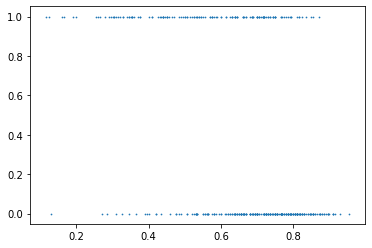

In [101]:
plt.scatter(preds_proba[:,0], y_test, s = .5);

In [102]:
#looks like a lot of overlap

In [103]:
loss = y_test - preds_proba[:,0]

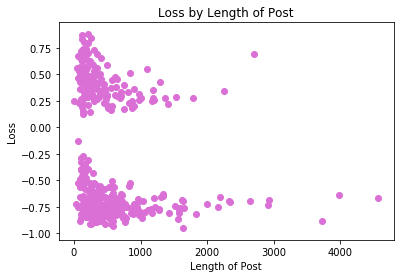

In [128]:
plt.scatter([len(x) for x in x_test], loss, color = 'orchid')

plt.title('Loss by Length of Post')
plt.ylabel('Loss')
plt.xlabel('Length of Post');

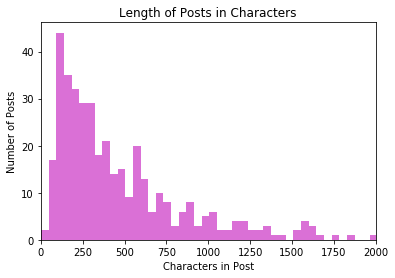

In [125]:
plt.title('Length of Posts in Characters')
plt.xlabel('Characters in Post')
plt.ylabel('Number of Posts')

plt.xlim(0, 2000)

plt.hist([len(x) for x in x_test], bins = 100, color='orchid');

In [106]:
#shorter posts tend to have more error? A lot of error overall...

Best random forest model:

{'cvec__max_df': 0.99, 'cvec__min_df': 5, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'rf__n_estimators': 200}

### Some more EDA on the dataset with no removed posts

In [107]:
cvec = CountVectorizer()

In [108]:
cvec.fit(x_train)
x_train_cvec = cvec.transform(x_train)

In [109]:
df_cvec = pd.DataFrame(x_train_cvec.todense(), columns = cvec.get_feature_names())

In [110]:
df_cvec['subreddit'] = df['subreddit']

In [111]:
df_cvec.groupby('subreddit').sum()

,00am,10,100,1000,100k,10ish,10k,10lb,10lbs,10th,...,yt,zealous,zelda,zero,zipper,zodiac,zoloft,zone,zones,zoom
subreddit,,,,,,,,,,,,,,,,,,,,,
0.0,1,17,7,1,1,0,1,1,1,1,...,1,0,1,3,3,1,0,8,1,0


In [112]:
#explore features of tfid 

In [113]:
tf = TfidfVectorizer(max_df = 0.8, min_df = 2, ngram_range = (1, 2), stop_words = 'english')

In [114]:
tf.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [115]:
x_train_tf = tf.transform(x_train)

In [116]:
df_tf = pd.DataFrame(x_train_tf.toarray(), columns = tf.get_feature_names())

In [117]:
df_tf.sum().sort_values(ascending = False).head(20) 

like            35.673739
just            31.686913
women           24.949526
feel            24.517705
ve              23.669451
know            23.067257
really          22.067793
want            21.927327
don             21.737334
men             21.324769
guy             20.941073
time            20.656677
did             19.369954
think           19.311902
guys            18.972573
girl            18.467236
sex             17.896582
does            15.484880
friend          15.401667
relationship    15.302187
dtype: float64

In [118]:
df_tf[df_tf['subreddit']==1].sum().sort_values(ascending = True).head(20) 

10                0.0
quality           0.0
putting effort    0.0
putting           0.0
puts              0.0
pussy             0.0
pushy             0.0
pushover think    0.0
pushover          0.0
pushing           0.0
pushed            0.0
quarter           0.0
push              0.0
pursue course     0.0
pursue            0.0
purposes          0.0
purposely         0.0
purpose           0.0
punching          0.0
pulling           0.0
dtype: float64

In [119]:
df_tf[df_tf['subreddit']==1].sum().sort_values(ascending = True).map(lambda x: x>0).sum()

0

In [120]:
df_tf[df_tf['subreddit']==0].sum().sort_values(ascending = False).map(lambda x: x>0).sum()

6755

In [121]:
y_train

481     0
2399    1
2220    1
615     0
3120    1
       ..
2510    1
1699    0
1112    0
1175    0
2614    1
Name: subreddit, Length: 1197, dtype: int64

In [122]:
coefs = pd.DataFrame(tf.get_feature_names(),columns=['word'])
coefs['beta'] = gs.coef_[0]
plt.hist(coefs['beta'], log=True, bins=20);
plt.xlabel('coef value')
plt.ylabel('frequency (log scale)')
plt.title('naive bayes coefs');

AttributeError: 'GridSearchCV' object has no attribute 'coef_'